In [ ]:
%pip install datasets

In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from datasets import load_dataset
import pandas as pd

def _fill_spiral(matrix, seq_colors, k):
        left, top, right, bottom = 0, 0, k-1, k-1
        index = 0
        while left <= right and top <= bottom:
            for i in range(left, right + 1):  # Top row
                if index < len(seq_colors):
                    matrix[top][i] = seq_colors[index]
                    index += 1
            top += 1
            for i in range(top, bottom + 1):  # Right column
                if index < len(seq_colors):
                    matrix[i][right] = seq_colors[index]
                    index += 1
            right -= 1
            for i in range(right, left - 1, -1):  # Bottom row
                if index < len(seq_colors):
                    matrix[bottom][i] = seq_colors[index]
                    index += 1
            bottom -= 1
            for i in range(bottom, top - 1, -1):  # Left column
                if index < len(seq_colors):
                    matrix[i][left] = seq_colors[index]
                    index += 1
            left += 1


def _generate_color_square(sequence, save=False, count=0, label=None):
    # Define the sequence and corresponding colors with indices
    colors = {'a': 0, 't': 1, 'c': 2, 'g': 3, 'n': 4}  # Assign indices to each color
    seq_colors = [colors[char] for char in sequence.lower()]  # Map the sequence to color indices

    # Calculate k (size of the square)
    k = math.ceil(math.sqrt(len(sequence)))

    # Initialize a k x k matrix filled with the index for 'white'
    matrix = np.full((k, k), colors['n'], dtype=int)

    # Fill the matrix in a clockwise spiral
    _fill_spiral(matrix, seq_colors, k)

    # Define a custom color map for plotting
    cmap = ListedColormap(['red', 'green', 'yellow', 'blue', 'white'])

    # Plot the matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    if label:
        plt.title(label)
    plt.axis('off')  # Hide the axes
    if save:
        plt.savefig(f'color_square_{count}.png', dpi=300, bbox_inches='tight')
    plt.show()


def generate_color_square(sequence, multi=False, save=False, label=None):
    if multi:
        for i,seq in enumerate(sequence):
            _generate_color_square(seq, save, i, label[i] if label else None)
    else:
        _generate_color_square(sequence, save, label=label)



In [ ]:
ds = load_dataset('Hack90/virus_5kbp_100kbp')

In [13]:
df = pd.DataFrame(ds['train'])

In [14]:
wnv = df[df.Organism_Name == 'West Nile virus']
dv = df[df.Organism_Name.str.contains('Dengue')]
cv = df[df.Organism_Name.str.contains('Chik')]

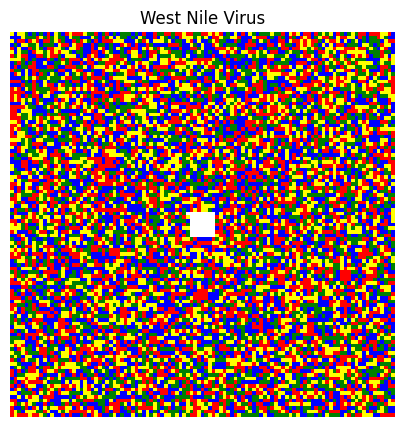

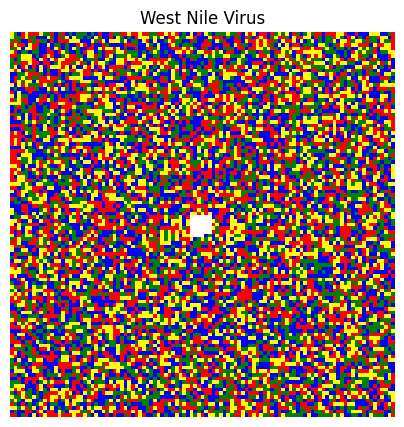

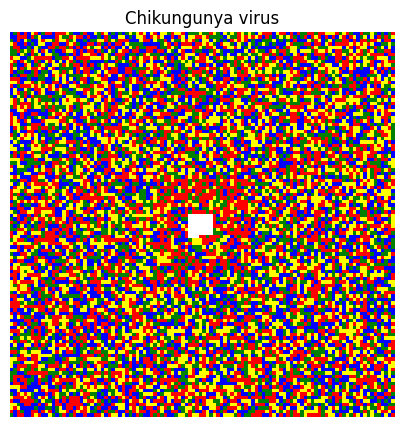

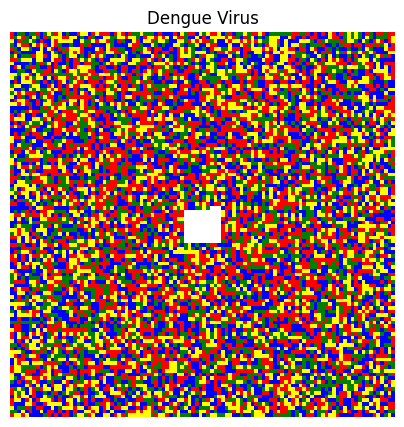

In [41]:
generate_color_square([wnv['Sequence'].values[8],wnv['Sequence'].values[7], cv['Sequence'].values[8], dv['Sequence'].values[0] ], multi=True, label=['West Nile Virus', 'West Nile Virus', 'Chikungunya virus', 'Dengue Virus'])